In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

## 1.1

In [435]:
filename = "sample order basket.csv"

df = pd.read_csv(filename)

## 1.2

In [436]:
products = df["Product"].sort_values().unique()
binary_table = pd.DataFrame()
binary_table["ID"] = df["OrderNum"].astype(int)

for x in products:
    binary_table[x] = df["Product"].str.contains(x)
    
binary_table.set_index("ID",inplace=True)
binary_table = binary_table.groupby(by=binary_table.index).sum().astype(str)

binary_table

,bread,cheese,eggs,flour,jam
ID,,,,,
1000,0,0,1,0,0
1001,1,0,0,0,0
1002,1,0,1,1,0
1003,1,0,1,0,1
1004,0,0,1,0,0
...,...,...,...,...,...
1495,1,0,1,1,0
1496,1,1,1,0,0
1497,0,0,0,0,1


## 1.3

In [438]:
report = pd.DataFrame()
combination = []
for x in binary_table.values:
    y = np.where(x=='1',products,0)
    y = tuple(y[y!=0])
    combination.append(y)
    
report["combination"] = combination #setting up the dataframe
report["count"] = True

results = report.groupby(["combination"])["combination"].count().sort_values(ascending=False) #gettiong the values of count

report = pd.DataFrame() #reseting of the dataframe 'report'

report["combination"] = results.index #storing the collected data
report["count"] = results.values

report

,combination,count
0,"(bread,)",65
1,"(bread, jam)",57
2,"(bread, eggs)",47
3,"(bread, eggs, jam)",46
4,"(eggs,)",31
5,"(jam,)",26
6,"(bread, eggs, flour)",21
7,"(bread, flour, jam)",18
8,"(bread, cheese, eggs)",17
9,"(eggs, jam)",17


## 2.1

In [469]:
import time
import json
import requests
iss_data = []
time_limit = 30*60 #30minutes
start_time = time.time()
location = 'International Space Station'

while True:
    current_time = time.time()
    req = requests.get("http://api.open-notify.org/iss-now.json")
    iss_data.append(json.loads(req.text))
    if current_time - start_time >= time_limit:
        break
    time.sleep(10)
#iss_data = iss_data.json()
with open("iss-data.json","w") as f:
    json.dump(iss_data,f)

## 2.2

In [470]:
filename = "iss-data.json"
with open("iss-data.json","r") as menu_file:
    jsondata2 = []
    for x in json.loads(menu_file.read()):
        jsondata2.append((x)["iss_position"])

df = pd.DataFrame(jsondata2)

x_sites = []
y_sites = []

for x in df["longitude"]:
    x_sites.append(float(x))
for y in df["latitude"]:
    y_sites.append(float(y))
    

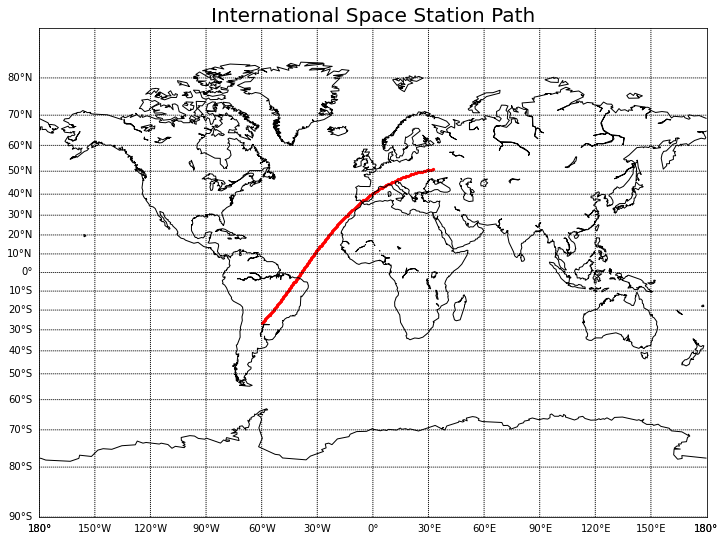

In [471]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

m.scatter(x_sites,y_sites,latlon=True, s=5,c="r")

plt.title('International Space Station Path', fontsize=20)

plt.show()